# IMPORT LIBRARIES

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# DATA UNDERSTANDING

In [20]:
df_0 = pd.read_csv("/kaggle/input/test-file/tested.csv")
df_0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [22]:
df_0.shape

(418, 12)

In [23]:
df_0.isnull().sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [7]:
#insights
#Data shape (418, 12)
#Data null values Age:86, Cabin:327
#We have int,float,object dtypes

# DATA PREPROCESSING

In [24]:
backup_df_0 = df_0.copy()

In [25]:
# Handling the Duplicates
df_0.index.is_unique
# we have no duplicates

True

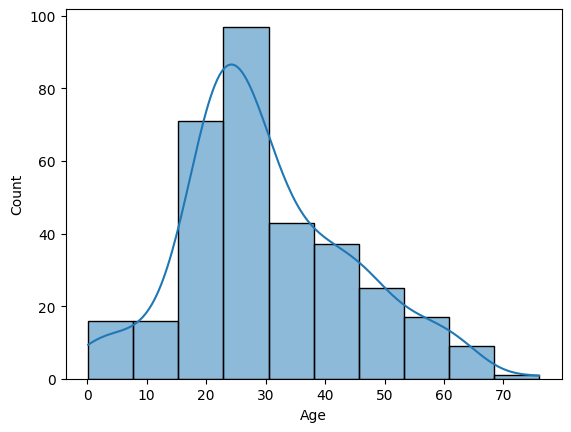

In [42]:
sns.histplot(data['Age'], bins = 10, kde = True)
plt.show()

In [50]:
def clean(data):
    data = data.drop(['Ticket', 'Cabin', 'Name', 'PassengerId'], axis = 1)
    cols = ['SibSp', 'Parch','Fare', 'Age' ]
    for col in cols:
        data[col].fillna(data[col].median(), inplace = True)
    data.Embarked.fillna('U', inplace = True)
    return data 

data = clean(df_0)


In [60]:
new_df=data[['Pclass','Sex','Age','Fare','Survived']]
new_df

,Pclass,Sex,Age,Fare,Survived
0,3,male,34.5,7.8292,0
1,3,female,47.0,7.0000,1
2,2,male,62.0,9.6875,0
3,3,male,27.0,8.6625,0
4,3,female,22.0,12.2875,1
...,...,...,...,...,...
413,3,male,27.0,8.0500,0
414,1,female,39.0,108.9000,1
415,3,male,38.5,7.2500,0
416,3,male,27.0,8.0500,0


In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['Sex']
for cols in col:
    new_df[cols] = le.fit_transform(new_df[cols])
    print(le.classes_)

['female' 'male']


In [66]:
new_df

,Pclass,Sex,Age,Fare,Survived
0,3,1,34.5,7.8292,0
1,3,0,47.0,7.0000,1
2,2,1,62.0,9.6875,0
3,3,1,27.0,8.6625,0
4,3,0,22.0,12.2875,1
...,...,...,...,...,...
413,3,1,27.0,8.0500,0
414,1,0,39.0,108.9000,1
415,3,1,38.5,7.2500,0
416,3,1,27.0,8.0500,0


# MODEL

In [72]:
X = new_df.drop('Survived', axis = 1)
y = new_df['Survived']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [74]:
#optuna for Random forest 
import optuna
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


def rf_objective(trial):
    maxfets = trial.suggest_int(name='max_features', low=5, high=100, step=1)
    nest = trial.suggest_int(name='n_estimators', low=5, high=100, step=1)
    
    rf_mod = RandomForestClassifier(max_features=maxfets, n_estimators=nest, random_state=4197)
    rf_mod.fit(X_train, y_train)
    
    test_pred = rf_mod.predict(X_test)
    accu = metrics.accuracy_score(y_true=y_test, y_pred=test_pred)
    
    return accu

rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=150, n_jobs=-1)

[I 2024-06-14 11:05:33,044] A new study created in memory with name: no-name-c03e8df1-f31c-45f6-89bb-eca047b8fadd
[I 2024-06-14 11:05:33,513] Trial 0 finished with value: 1.0 and parameters: {'max_features': 23, 'n_estimators': 44}. Best is trial 0 with value: 1.0.
[I 2024-06-14 11:05:33,515] Trial 3 finished with value: 1.0 and parameters: {'max_features': 27, 'n_estimators': 34}. Best is trial 0 with value: 1.0.
[I 2024-06-14 11:05:33,526] Trial 1 finished with value: 1.0 and parameters: {'max_features': 37, 'n_estimators': 43}. Best is trial 0 with value: 1.0.
[I 2024-06-14 11:05:33,979] Trial 6 finished with value: 1.0 and parameters: {'max_features': 95, 'n_estimators': 41}. Best is trial 0 with value: 1.0.
[I 2024-06-14 11:05:34,004] Trial 2 finished with value: 1.0 and parameters: {'max_features': 80, 'n_estimators': 82}. Best is trial 0 with value: 1.0.
[I 2024-06-14 11:05:34,166] Trial 4 finished with value: 1.0 and parameters: {'max_features': 87, 'n_estimators': 57}. Best is

In [75]:
rf_study.best_params

{'max_features': 23, 'n_estimators': 44}

In [76]:
rf_model=RandomForestClassifier(max_features=rf_study.best_params['max_features'], 
                                n_estimators=rf_study.best_params['n_estimators'], 
                                random_state=4197, n_jobs=-1)
rf_model=rf_model.fit(X_train,y_train)

In [77]:
train_pred_rf = rf_model.predict(X_train)
test_pred_rf = rf_model.predict(X_test)

In [78]:
rfTrain_accu = metrics.accuracy_score(y_true=y_train, y_pred=train_pred_rf)

rfTest_accu = metrics.accuracy_score(y_true=y_test, y_pred=test_pred_rf)

print(f'RANDOM FORESTS train accuracy:{rfTrain_accu}, RANDOM FORESTS test accuracy:{rfTest_accu}')

RANDOM FORESTS train accuracy:1.0, RANDOM FORESTS test accuracy:1.0
